In [1]:
#import neccessery library
#house price prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
train=pd.read_csv("C://Users/Satyam Meena/Desktop/Data Science/Data/House Price Prediction/train (2).csv")
test=pd.read_csv("C://Users/Satyam Meena/Desktop/Data Science/Data/House Price Prediction/test (1).csv")

In [4]:
test['SalePrice']=-1

In [5]:
data=pd.concat([train,test])

In [ ]:
data.info()

In [6]:
data=data.drop(columns=['PoolQC','Fence','MiscFeature','Alley','FireplaceQu','Id'],axis=1)

In [7]:
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageYrBlt']=data['GarageYrBlt'].fillna(data['GarageYrBlt'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])


In [8]:
data['SaleType']=data['SaleType'].fillna(data['SaleType'].mode()[0])
data['GarageArea']=data['GarageArea'].fillna(data['GarageArea'].mean())
data['GarageCars']=data['GarageCars'].fillna(data['GarageCars'].mean())
data['Functional']=data['Functional'].fillna(data['Functional'].mode()[0])
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['BsmtFullBath']=data['BsmtFullBath'].fillna(data['BsmtFullBath'].mean())
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mean())
data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data['Utilities']=data['Utilities'].fillna(data['Utilities'].mode()[0])
data['Exterior1st']=data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd']=data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mean())
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean())
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mean())
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [10]:
#lets do Lable enconding coding to make more features 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 25:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

38 columns were label encoded.


In [11]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(data[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value


In [12]:
#Divide into test and train:
train = data.loc[data['SalePrice']!=-1]
test = data.loc[data['SalePrice']==-1]
train.shape,test.shape

((1460, 75), (1459, 75))

In [ ]:

#Correlation
#Checking Correlation / Multivariate Analysis 
corr=train.corr()
plt.figure(figsize=[42,22])
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
#Checking Correlation with respect to target column
corr['SalePrice'].sort_values()

In [14]:
x=train.drop('SalePrice',axis=1)
y=train.SalePrice

In [15]:
from sklearn.feature_selection import SelectKBest,f_regression 

In [16]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# Finding the multicollinerity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

#let's check the values
vif

# Select K Best Features

In [19]:
best_features=SelectKBest(score_func=f_regression,k=25)
fit=best_features.fit(x_scaled,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

# concatenate dataframes
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(25,'Score'))

    Feature_Name        Score
15   OverallQual  2436.770591
44     GrLivArea  1470.585010
58    GarageCars  1013.705666
25     ExterQual   994.979678
59    GarageArea   926.951287
28      BsmtQual   901.052816
36   TotalBsmtSF   880.341282
41      1stFlrSF   845.524488
51   KitchenQual   775.262307
47      FullBath   668.430296
57  GarageFinish   591.563732
52  TotRmsAbvGrd   580.762801
17     YearBuilt   548.665821
18  YearRemodAdd   504.714855
24    MasVnrArea   425.293347
54    Fireplaces   406.503866
38     HeatingQC   278.007890
56   GarageYrBlt   274.059167
32    BsmtFinSF1   255.923517
27    Foundation   249.840256
2    LotFrontage   184.085225
63    WoodDeckSF   171.494673
42      2ndFlrSF   165.561151
64   OpenPorchSF   161.577391
55    GarageType   146.432920


In [20]:
 new_x=train[['OverallQual','GrLivArea','GarageCars','ExterQual','GarageArea','BsmtQual','TotalBsmtSF','1stFlrSF',
              'KitchenQual','FullBath','GarageFinish','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces',
              'HeatingQC','GarageYrBlt','BsmtFinSF1','Foundation','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','GarageType'
             ]]

In [39]:
test=test[['OverallQual','GrLivArea','GarageCars','ExterQual','GarageArea','BsmtQual','TotalBsmtSF','1stFlrSF',
              'KitchenQual','FullBath','GarageFinish','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces',
              'HeatingQC','GarageYrBlt','BsmtFinSF1','Foundation','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','GarageType'
             ]]

In [48]:
new_test=pd.read_csv("C://Users/Satyam Meena/Desktop/Data Science/Data/House Price Prediction/test (1).csv")
Id=new_test['Id']

In [24]:
#Importing Libraries required for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [25]:
#Finding Best Random State
max_score=0
random_state=0
for i in range(0,100):
    X_train,X_test,Y_train,Y_test=train_test_split(new_x,y,random_state=i,test_size=0.3)
    LR=LinearRegression()
    LR.fit(X_train,Y_train)
    pred=LR.predict(X_test)
    r2score=r2_score(Y_test,pred)
    if max_score<r2score:
        max_score=r2score
        random_state=i
        print('r2score is :',max_score,'random_state is :',random_state)

r2score is : 0.7169297881053516 random_state is : 0
r2score is : 0.8461261055292776 random_state is : 1
r2score is : 0.8510066814356922 random_state is : 4
r2score is : 0.8562911947788019 random_state is : 40
r2score is : 0.861585243747589 random_state is : 45
r2score is : 0.8663158864224535 random_state is : 80


In [26]:
#Our model gives best accuracy of 85% on random state 25.

#Train Test Split
X_train,X_test,Y_train,Y_test=train_test_split(new_x,y,random_state=80,test_size=0.3)

In [27]:
#ML Alogrithms
#Linear Regression
lr=LinearRegression()
lr.fit(X_train,Y_train)
predlr=lr.predict(X_test)
print(r2_score(Y_test,predlr))

0.8663158864224535


In [28]:
#Decision Tree Regression
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
preddtr=dtr.predict(X_test)
print(r2_score(Y_test,preddtr))

0.7243559473723136


In [29]:
#Random Forest Regression
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)
predrfr=rfr.predict(X_test)
print(r2_score(Y_test,predrfr))

0.8883955864193949


In [30]:
#KNeighborsRegression
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
predknn=knn.predict(X_test)
print(r2_score(Y_test,predknn))

0.7411545953310259


# Cross Validation Score

In [35]:
#Linear Regression
from sklearn.model_selection import cross_val_score
scr1=cross_val_score(lr,new_x,y,cv=5)
print('Cross Validation Score :', scr1.mean())

Cross Validation Score : 0.7882134437666629


In [36]:
#Decision Tree regression
scr2=cross_val_score(dtr,new_x,y,cv=5)
print('Cross Validation Score :', scr2.mean())

Cross Validation Score : 0.7483408859997219


In [37]:
#Random Forest Regression
scr3=cross_val_score(rfr,new_x,y,cv=5)
print('Cross Validation Score :', scr3.mean())

Cross Validation Score : 0.8518261604667403


In [38]:
#KNeighborsRegression
scr4=cross_val_score(knn,new_x,y,cv=5)
print('Cross Validation Score :', scr4.mean())

Cross Validation Score : 0.7232510704987826


# Hyper Parameter Tuning

In [40]:
#Grid SearchCV
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300,1000]
}
gcv=GridSearchCV(rfr,param_grid,cv=5)
gcv.fit(X_train,Y_train)
gcv.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [41]:
#Predicting values from Grid SearchCV
predgcv=gcv.best_estimator_.predict(X_test)
r2_score(Y_test,predgcv)

0.8910665937034428

In [50]:
y_pred_test=gcv.best_estimator_.predict(test)
y_pred_test.shape

(1459,)

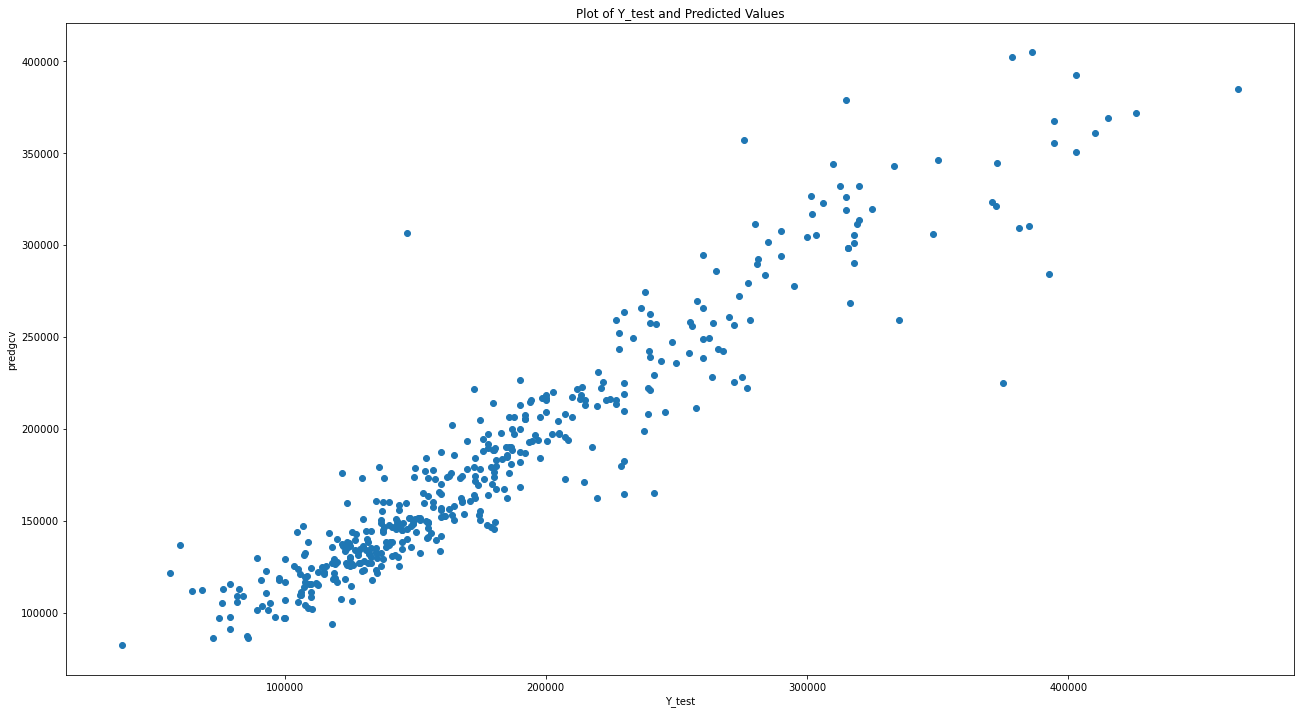

In [42]:
#Plot of Y_test vs Predicted Values
plt.figure(figsize=[22,12])
plt.scatter(Y_test,predgcv)
plt.xlabel('Y_test')
plt.ylabel('predgcv')
plt.title('Plot of Y_test and Predicted Values')
plt.show()

In [ ]:
#Plot of Predicted values
plt.figure(figsize=[22,12])
plt.plot(predgcv)
plt.title('Graph of Predicted SalePrice')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

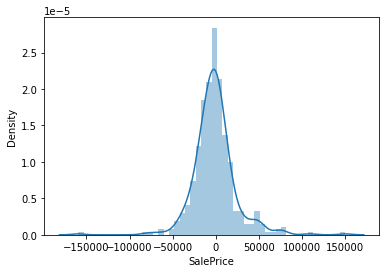

In [43]:
#Plot of Errors
sns.distplot(Y_test-predgcv)

In [52]:
my_submission = pd.DataFrame({'Id': Id, 'SalePrice':y_pred_test})
# you could use any filename. We choose submission here
my_submission.to_csv('submissions.csv', index=False)